In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split


In [2]:
df_train=pd.read_csv("train.csv")
df_train.head()
df_test=pd.read_csv("test.csv")


In [3]:
df_train.shape

(3599999, 3)

In [4]:
df_train.columns=["polarity","title","text"]
df_test.columns=["polarity","title","text"]

In [5]:
train=df_train
test=df_test


In [6]:
train.drop(["title"],axis=1,inplace=True)
train=df_train.sample(500000,random_state=99)
train.head()

,polarity,text
2136295,2,"Yes, go ahead and laugh. But some of the other..."
2620775,2,"Wow,This movie is a classic. Family movie by a..."
1588872,1,I THOUGHT APPLE WAS USER FRIENDLY???????? I GU...
3125694,2,I bought this book after joining Curves. It he...
1668956,1,The first ten minutes of the film passed with ...


In [51]:
train.polarity.value_counts()

polarity
0    250014
1    249986
Name: count, dtype: int64

In [23]:
train.shape

(500000, 2)

In [7]:
test.drop(["title"],axis=1,inplace=True)
test=df_test.sample(200000,random_state=99)
test.head()

,polarity,text
110227,1,I met the author of this book/software at a wr...
118016,1,I bought this book several years ago and it wa...
180926,1,I have had two of these units and both worked ...
121412,1,Really liked the Mobiblue 1500 cube at first -...
128565,1,This trilogy was recommended to me and I was s...


In [8]:
train['polarity'] = train['polarity'].apply(lambda x: 0 if x == 2 else 1)
test['polarity'] = test['polarity'].apply(lambda x: 0 if x == 2 else 1)
# 0 is positive
# 1 is negative

In [9]:
print("train:\n", 
      train.isnull().sum(), 
      "\n", 
      "----------\n")
print("test:\n", 
      test.isnull().sum(), 
      "\n",
      "----------\n")

train:
 polarity    0
text        0
dtype: int64 
 ----------

test:
 polarity    0
text        0
dtype: int64 
 ----------



In [10]:
len_train=len(train)
print(len_train)

500000


In [26]:
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
def preprocess_train_text(x):
    corpus=[]
    for i in range(0,500000):
        review=re.sub("^a-zA-Z"," ",x.iloc[i]["text"])
        review=review.lower()
        review=review.split()
        ps=PorterStemmer()
        all_stopwords=stopwords.words("English")
        all_stopwords.remove("not")
        review=[ps.stem(word) for word in review if not word in set(all_stopwords)] #remove words which wont help us 
        review=" ".join(review)
        corpus.append(review)
        
    return corpus
    
def preprocess_test_text(x):
    corpus=[]
    for i in range(0,200000):
        review=re.sub("^a-zA-Z"," ",x.iloc[i]["text"])
        review=review.lower()
        review=review.split()
        ps=PorterStemmer()
        all_stopwords=stopwords.words("English")
        all_stopwords.remove("not")
        review=[ps.stem(word) for word in review if not word in set(all_stopwords)] #remove words which wont help us 
        review=" ".join(review)
        corpus.append(review)
        
    return corpus
    


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ihars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
train_corpus=preprocess_train_text(train)
test_corpus=preprocess_test_text(test)

In [28]:
train.shape
print(len(train_corpus))

500000


In [29]:
from collections import Counter
cnt = Counter()
for text in train_corpus:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20) 

[('not', 270191),
 ('book', 210314),
 ('one', 155130),
 ('like', 148412),
 ('get', 114985),
 ('would', 112914),
 ('use', 103996),
 ('read', 99878),
 ('good', 95974),
 ('great', 89830),
 ('love', 78498),
 ('time', 74079),
 ('make', 73659),
 ('realli', 73429),
 ('work', 70978),
 ('it.', 68550),
 ('even', 66394),
 ('look', 63190),
 ('buy', 61997),
 ('movi', 61218)]

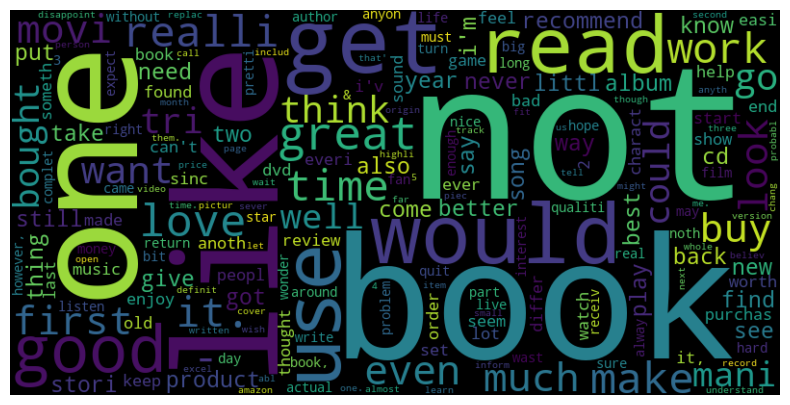

In [15]:
from wordcloud import WordCloud
word_freq = dict(cnt)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [17]:
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in {'book','would','read','it.'}])

train_corpus = [remove_freqwords(text) for text in train_corpus]
test_corpus = [remove_freqwords(text) for text in test_corpus]

In [30]:
from collections import Counter
cnt = Counter()
for text in train_corpus:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20)

[('not', 270191),
 ('book', 210314),
 ('one', 155130),
 ('like', 148412),
 ('get', 114985),
 ('would', 112914),
 ('use', 103996),
 ('read', 99878),
 ('good', 95974),
 ('great', 89830),
 ('love', 78498),
 ('time', 74079),
 ('make', 73659),
 ('realli', 73429),
 ('work', 70978),
 ('it.', 68550),
 ('even', 66394),
 ('look', 63190),
 ('buy', 61997),
 ('movi', 61218)]

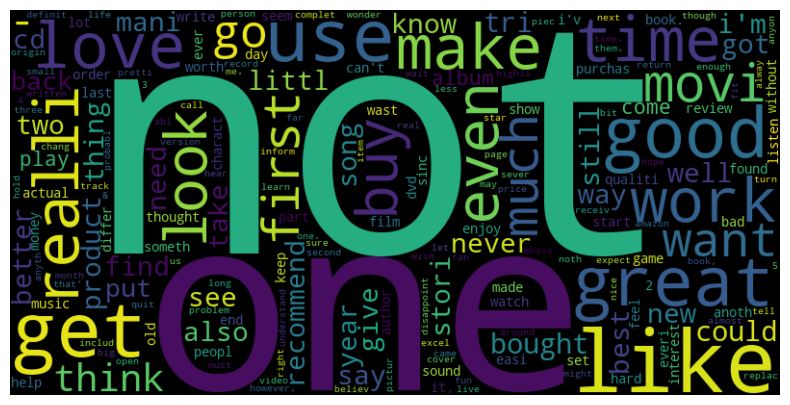

In [19]:
from wordcloud import WordCloud
word_freq = dict(cnt)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1800)
X_train=cv.fit_transform(train_corpus)
y_train=train.iloc[:,0].values 
X_test=cv.transform(test_corpus)
y_test=test.iloc[:,0].values

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr=LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
conf_matrix = confusion_matrix(y_test, y_predict)
class_report = classification_report(y_test, y_predict)

print("Accuracy             :", accuracy)
print("Confusion Matrix     :\n", conf_matrix)
print("Classification Report:\n", class_report)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy             : 0.846785
Confusion Matrix     :
 [[86009 14163]
 [16480 83348]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85    100172
           1       0.85      0.83      0.84     99828

    accuracy                           0.85    200000
   macro avg       0.85      0.85      0.85    200000
weighted avg       0.85      0.85      0.85    200000



In [161]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy             :", accuracy)
print("Confusion Matrix     :\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy             : 0.809675
Confusion Matrix     :
 [[81680 18492]
 [19573 80255]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81    100172
           1       0.81      0.80      0.81     99828

    accuracy                           0.81    200000
   macro avg       0.81      0.81      0.81    200000
weighted avg       0.81      0.81      0.81    200000

